# Essential Math for Machine Learning: Python Edition

Course source: [LinkedIn Learning](https://www.linkedin.com/learning/essential-math-for-machine-learning-python-edition)

## 1 Data and Data Visualization
Machine learning, and therefore a large part of AI, is based on statistical analysis of data. In this notebook, you'll examine some fundamental concepts related to data and data visualization.

### 1.1 Introduction to Data
Statistics are based on data, which consist of a collection of pieces of information about things you want to study. This information can take the form of descriptions, quantities, measurements, and other observations. Typically, we work with related data items in a *dataset*, which often consists of a collection of *observations* or *cases*. Most commonly, we thing about this dataset as a table that consists of a row for each observation, and a column for each individual data point related to that observation - we variously call these data points *attributes* or *features*, and they each describe a specific characteristic of the thing we're observing.

Let's take a look at a real example. In 1886, Francis Galton conducted a study into the relationship between heights of parents and their (adult) children. Run the Python code below to view the data he collected (you can safely ignore a deprecation warning if it is displayed):

In [1]:
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


#### 1.1.1 Types of Data
Now, let's take a closer look at this data (you can click the left margin next to the dataset to toggle between full height and a scrollable pane). There are 933 observations, each one recording information pertaining to an individual child. The information recorded consists of the following features:
- **family**: An identifier for the family to which the child belongs.
- **father**: The height of the father.
- **mother**: The height of the mother.
- **midparentHeight**: The mid-point between the father and mother's heights (calculated as *(father + 1.08 x mother) &div; 2*)
- **children**: The total number of children in the family.
- **childNum**: The number of the child to whom this observation pertains (Galton numbered the children in desending order of height, with male children listed before female children)
- **gender**: The gender of the child to whom this observation pertains.
- **childHeight**: The height of the child to whom this observation pertains.

It's worth noting that there are several distinct types of data recorded here. To begin with, there are some features that represent *qualities*, or characteristics of the child - for example, gender. Other feaures represent a *quantity* or measurement, such as the child's height. So broadly speaking, we can divide data into *qualitative* and *quantitative* data.

##### 1.1.1.1 Qualitative Data
Let's take a look at qualitative data first. This type of data is categorical - it is used to categorize or identify the entity being observed. Sometimes you'll see features of this type described as *factors*. 
###### 1.1.1.1.1 Nominal Data
In his observations of children's height, Galton assigned an identifier to each family and he recorded the gender of each child. Note that even though the **family** identifier is a number, it is not a measurement or quantity. Family 002 it not "greater" than family 001, just as a **gender** value of "male" does not indicate a larger or smaller value than "female". These are simply named values for some characteristic of the child, and as such they're known as *nominal* data.
###### 1.1.1.1.2 Ordinal Data
So what about the **childNum** feature? It's not a measurement or quantity - it's just a way to identify individual children within a family. However, the number assigned to each child has some additional meaning - the numbers are ordered. You can find similar data that is text-based; for example, data about training courses might include a "level" attribute that indicates the level of the course as "basic:, "intermediate", or "advanced". This type of data, where the value is not itself a quantity or measurement, but it indicates some sort of inherent order or heirarchy, is known as *ordinal* data.
##### 1.1.1.2 Quantitative Data
Now let's turn our attention to the features that indicate some kind of quantity or measurement.
###### 1.1.1.2.1 Discrete Data
Galton's observations include the number of **children** in each family. This is a *discrete* quantative data value - it's something we *count* rather than *measure*. You can't, for example, have 2.33 children!
###### 1.1.1.2.2 Continuous Data
The data set also includes height values for **father**, **mother**, **midparentHeight**, and **childHeight**. These are measurements along a scale, and as such they're described as *continuous* quantative data values that we *measure* rather than *count*.

#### 1.1.2 Sample vs Population
Galton's dataset includes 933 observations. It's safe to assume that this does not account for every person in the world, or even just the UK, in 1886 when the data was collected. In other words, Galton's data represents a *sample* of a larger *population*. It's worth pausing to think about this for a few seconds, because there are some implications for any conclusions we might draw from Galton's observations.

Think about how many times you see a claim such as "one in four Americans enjoys watching football". How do the people who make this claim know that this is a fact? Have they asked everyone in the the US about their football-watching habits? Well, that would be a bit impractical, so what usually happens is that a study is conducted on a subset of the population, and (assuming that this is a well-conducted study), that subset will be a representative sample of the population as a whole. If the survey was conducted at the stadium where the Superbowl is being played, then the results are likely to be skewed because of a bias in the study participants.

Similarly, we might look at Galton's data and assume that the heights of the people included in the study bears some relation to the heights of the general population in 1886; but if Galton specifically selected abnormally tall people for his study, then this assumption would be unfounded.

When we deal with statistics, we usually work with a sample of the data rather than a full population. As you'll see later, this affects the way we use notation to indicate statistical measures; and in some cases we calculate statistics from a sample differently than from a full population to account for bias in the sample.

#### 1.1.3 Visualizing Data
Data visualization is one of the key ways in which we can examine data and get insights from it. If a picture is worth a thousand words, then a good graph or chart is worth any number of tables of data.

Let's examine some common kinds of data visualization:
##### 1.1.3.1 Bar Charts
A *bar chart* is a good way to compare numeric quantities or counts across categories. For example, in the Galton dataset, you might want to compare the number of female and male children.

Here's some Python code to create a bar chart showing the number of children of each gender.

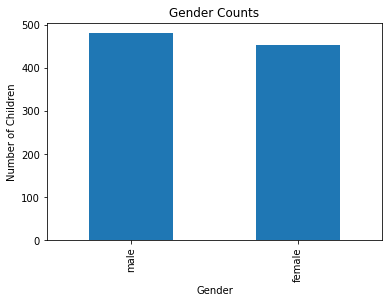

In [3]:
# Create a data frame of gender counts
genderCounts = df['gender'].value_counts()

genderCounts.plot(kind='bar', title='Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()

From this chart, you can see that there are slightly more male children than female children; but the data is reasonably evenly split between the two genders.

Bar charts are typically used to compare categorical (qualitative) data values; but in some cases you might treat a discrete quantitative data value as a category. For example, in the Galton dataset the number of children in each family could be used as a way to categorize families. We might want to see how many familes have one child, compared to how many have two children, etc.

Here's some Python code to create a bar chart showing family counts based on the number of children in the family.

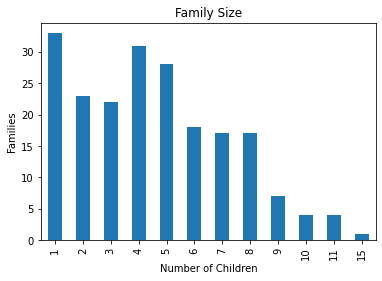

In [4]:
# Create a data frame of child counts
# there's a row for each child, so we need to filter to one row per family to avoid over-counting
families = df[['family', 'children']].drop_duplicates()
# Now count number of rows for each 'children' value, and sort by the index (children)
childCounts = families['children'].value_counts().sort_index()

childCounts.plot(kind='bar', title='Family Size')
plt.xlabel('Number of Children')
plt.ylabel('Families')
plt.show()

Note that the code sorts the data so that the categories on the *x* axis are in order - attention to this sort of detail can make your charts easier to read. In this case, we can see that the most common number of children per family is 1, followed by 5 and 6. Comparatively fewer families have more than 8 children.

##### 1.1.3.2 Histograms
Bar charts work well for comparing categorical or discrete numeric values. When you need to compare continuous quantitative values, you can use a similar style of chart called a *histogram*. Histograms differ from bar charts in that they group the continuous values into ranges or *bins* - so the chart doesn't show a bar for each individual value, but rather a bar for each range of binned values. Because these bins represent continuous data rather than discrete data, the bars aren't separated by a gap. Typically, a histogram is used to show the relative frequency of values in the dataset.

Here's some Python code to create a histogram of the **father** values in the Galton dataset, which record the father's height:

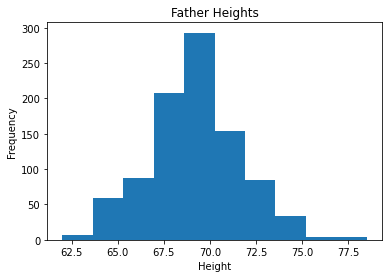

In [5]:
df['father'].plot.hist(title='Father Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the most frequently occuring heights tend to be in the mid-range. There are fewer extremely short or exteremely tall fathers.

In the histogram above, the number of bins (and their corresponding ranges, or *bin widths*) was determined automatically by Python. In some cases you may want to explicitly control the number of bins, as this can help you see detail in the distribution of data values that otherwise you might miss. The following code creates a histogram for the same father's height values, but explicitly distributes them over 20 bins (19 are specified, and Python adds one):

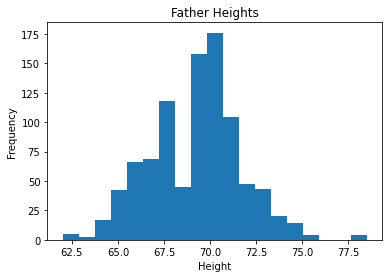

In [6]:
df['father'].plot.hist(title='Father Heights', bins=19)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

We can still see that the most common heights are in the middle, but there's a notable drop in the number of fathers with a height between 67.5 and 70.

##### 1.1.3.3 Pie Charts
Pie charts are another way to compare relative quantities of categories. They're not commonly used by data scientists, but they can be useful in many business contexts with manageable numbers of categories because they not only make it easy to compare relative quantities by categories; they also show those quantities as a proportion of the whole set of data.

Here's some Python to show the gender counts as a pie chart:

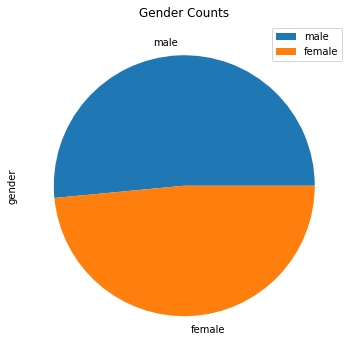

In [7]:
# Create a data frame of gender counts
genderCounts = df['gender'].value_counts()

genderCounts.plot(kind='pie', title='Gender Counts', figsize=(6,6))
plt.legend()
plt.show()

Note that the chart includes a *legend* to make it clear what category each colored area in the pie chart represents. From this chart, you can see that males make up slightly more than half of the overall number of children; with females accounting for the rest.

##### 1.1.3.4 Scatter Plots
Often you'll want to compare quantative values. This can be especially useful in data science scenarios where you are exploring data prior to building a machine learning model, as it can help identify apparent relationships between numeric features. Scatter plots can also help identify potential outliers - values that are significantly outside of the normal range of values.

The following Python code creates a scatter plot that plots the intersection points for  **midparentHeight** on the *x* axis, and **childHeight** on the *y* axis:

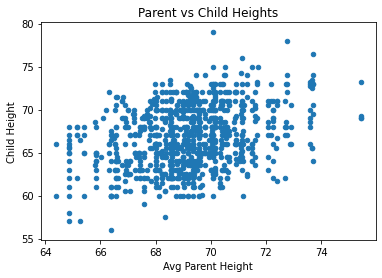

In [8]:
# Create a data frame of heights (father vs child)
parentHeights = df[['midparentHeight', 'childHeight']]

parentHeights.plot(kind='scatter', title='Parent vs Child Heights', x='midparentHeight', y='childHeight')
plt.xlabel('Avg Parent Height')
plt.ylabel('Child Height')
plt.show()

In a scatter plot, each dot marks the intersection point of the two values being plotted. In this chart, most of the heights are clustered around the center; which indicates that most parents and children tend to have a height that is somewhere in the middle of the range of heights observed. At the bottom left, there's a small cluster of dots that show some parents from the shorter end of the range who have children that are also shorter than their peers. At the top right, there are a few extremely tall parents who have extremely tall children. It's also interesting to note that the top left and bottom right of the chart are empty - there aren't any cases of extremely short parents with extremely tall children or vice-versa.

##### 1.1.3.6 Line Charts
*Line charts* are a great way to see changes in values along a series - usually (but not always) based on a time period. The Galton dataset doesn't include any data of this type, so we'll use a different dataset that includes observations of sea surface temperature between 1950 and 2010 for this example:

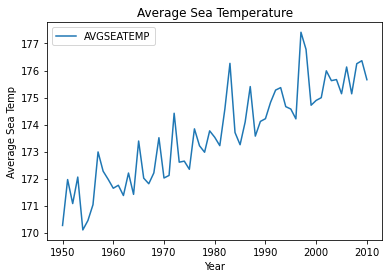

In [10]:
df = sm.datasets.elnino.load_pandas().data

df['AVGSEATEMP'] = df.mean(1)

# Plot a line chart
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(title='Average Sea Temperature', x='YEAR', y='AVGSEATEMP')
plt.xlabel('Year')
plt.ylabel('Average Sea Temp')
plt.show()

The line chart shows the temperature trend from left to right for the period of observations. From this chart, you can see that the average temperature fluctuates from year to year, but the general trend shows an increase.

## 2 Statistics Fundamentals
Statistics is primarily about analyzing data samples, and that starts with udnerstanding the distribution of data in a sample.

### 2.1 Analyzing Data Distribution
A great deal of statistical analysis is based on the way that data values are distributed within the dataset. In this section, we'll explore some statistics that you can use to tell you about the values in a dataset.

#### 2.1.1 Measures of Central Tendency
The term *measures of central tendency* sounds a bit grand, but really it's just a fancy way of saying that we're interested in knowing where the middle value in our data is. For example, suppose decide to conduct a study into the comparative salaries of people who graduated from the same school. You might record the results like this:

| Name     | Salary      |
|----------|-------------|
| Dan      | 50,000      |
| Joann    | 54,000      |
| Pedro    | 50,000      |
| Rosie    | 189,000     |
| Ethan    | 55,000      |
| Vicky    | 40,000      |
| Frederic | 59,000      |

Now, some of the former-students may earn a lot, and others may earn less; but what's the salary in the middle of the range of all salaries?

##### 2.1.1.1 Mean
A common way to define the central value is to use the *mean*, often called the *average*. This is calculated as the sum of the values in the dataset, divided by the number of observations in the dataset. When the dataset consists of the full population, the mean is represented by the Greek symbol ***&mu;*** (*mu*), and the formula is written like this:

\begin{equation}\mu = \frac{\displaystyle\sum_{i=1}^{N}X_{i}}{N}\end{equation}

More commonly, when working with a sample, the mean is represented by ***x&#772;*** (*x-bar*), and the formula is written like this (note the lower case letters used to indicate values from a sample):

\begin{equation}\bar{x} = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}\end{equation}

In the case of our list of heights, this can be calculated as:

\begin{equation}\bar{x} = \frac{50000+54000+50000+189000+55000+40000+59000}{7}\end{equation}

Which is **71,000**.

>In technical terminology, ***x&#772;*** is a *statistic* (an estimate based on a sample of data) and ***&mu;*** is a *parameter* (a true value based on the entire population). A lot of the time, the parameters for the full population will be impossible (or at the very least, impractical) to measure; so we use statistics obtained from a representative sample to approximate them. In this case, we can use the sample mean of salary for our selection of surveyed students to try to estimate the actual average salary of all students who graduate from our school.

In Python, when working with data in a *pandas.dataframe*, you can use the ***mean*** function, like this:

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print (df['Salary'].mean())

71000.0


So, is **71,000** really the central value? Or put another way, would it be reasonable for a graduate of this school to expect to earn $71,000? After all, that's the average salary of a graduate from this school.

If you look closely at the salaries, you can see that out of the seven former students, six earn less than the mean salary. The data is *skewed* by the fact that Rosie has clearly managed to find a much higher-paid job than her classmates.

##### 2.1.1.2 Median

OK, let's see if we can find another definition for the central value that more closely reflects the expected earning potential of students attending our school. Another measure of central tendancy we can use is the *median*. To calculate the median, we need to sort the values into ascending order and then find the middle-most value. When there are an odd number of observations, you can find the position of the median value using this formula (where *n* is the number of observations):

\begin{equation}\frac{n+1}{2}\end{equation}

Remember that this formula returns the *position* of the median value in the sorted list; not the value itself.

If the number of observations is even, then things are a little (but not much) more complicated. In this case you calculate the median as the average of the two middle-most values, which are found like this:

\begin{equation}\frac{n}{2} \;\;\;\;and \;\;\;\; \frac{n}{2} + 1\end{equation}

So, for our graduate salaries; first lets sort the dataset:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

There's an odd number of observation (7), so the median value is at position (7 + 1) &div; 2; in other words, position 4:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
|***>54,000*** |
| 55,000      |
| 59,000      |
| 189,000     |

So the median salary is **54,000**.

The *pandas.dataframe* class in Python has a ***median*** function to find the median:

In [13]:
print (df['Salary'].median())

54000.0


##### 2.1.1.3 Mode
Another related statistic is the *mode*, which indicates the most frequently occurring value. If you think about it, this is potentially a good indicator of how much a student might expect to earn when they graduate from the school; out of all the salaries that are being earned by former students, the mode is earned by more than any other.

Looking at our list of salaries, there are two instances of former students earning **50,000**, but only one instance each for all other salaries:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

The mode is therefore **50,000**.

As you might expect, the *pandas.dataframe* class has a ***mode*** function to return the mode:

In [14]:
print (df['Salary'].mode())

0    50000
dtype: int64


###### 2.1.1.3.1 Multimodal Data
It's not uncommon for a set of data to have more than one value as the mode. For example, suppose Ethan receives a raise that takes his salary to **59,000**:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
|***>59,000***|
|***>59,000***|
| 189,000     |

Now there are two values with the highest frequency. This dataset is *bimodal*. More generally, when there is more than one mode value, the data is considered *multimodal*.

The *pandas.dataframe.**mode*** function returns all of the modes:

In [17]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,59000,40000,59000]})

print (df['Salary'].mode())

0    50000
1    59000
dtype: int64


#### 2.1.2 Distribution and Density
Now we know something about finding the center, we can start to explore how the data is distributed around it. What we're interested in here is understanding the general "shape" of the data distribution so that we can begin to get a feel for what a 'typical' value might be expected to be.

We can start by finding the extremes - the minimum and maximum. In the case of our salary data, the lowest paid graduate from our school is Vicky, with a salary of **40,000**; and the highest-paid graduate is Rosie, with **189,000**.

The *pandas.dataframe* class has ***min*** and ***max*** functions to return these values.

Run the following code to compare the minimum and maximum salaries to the central measures we calculated previously:

In [18]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print ('Min: ' + str(df['Salary'].min()))
print ('Mode: ' + str(df['Salary'].mode()[0]))
print ('Median: ' + str(df['Salary'].median()))
print ('Mean: ' + str(df['Salary'].mean()))
print ('Max: ' + str(df['Salary'].max()))

Min: 40000
Mode: 50000
Median: 54000.0
Mean: 71000.0
Max: 189000


We can examine these values, and get a sense for how the data is distributed - for example, we can see that the *mean* is closer to the max than the *median*, and that both are closer to the *min* than to the *max*.

However, it's generally easier to get a sense of the distribution by visualizing the data. Let's start by creating a histogram of the salaries, highlighting the *mean* and *median* salaries (the *min*, *max* are fairly self-evident, and the *mode* is wherever the highest bar is):

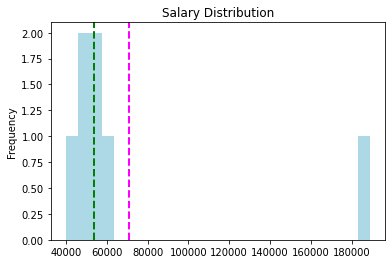

In [21]:
salary = df['Salary']
salary.plot.hist(title='Salary Distribution', color='lightblue', bins=25)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)

The <span style="color:magenta">***mean***</span> and <span style="color:green">***median***</span> are shown as dashed lines. Note the following:
- *Salary* is a continuous data value - graduates could potentially earn any value along the scale, even down to a fraction of cent.
- The number of bins in the histogram determines the size of each salary band for which we're counting frequencies. Fewer bins means merging more individual salaries together to be counted as a group.
- The majority of the data is on the left side of the histogram, reflecting the fact that most graduates earn between 40,000 and 55,000
- The mean is a higher value than the median and mode.
- There are gaps in the histogram for salary bands that nobody earns.

The histogram shows the relative frequency of each salary band, based on the number of bins. It also gives us a sense of the *density* of the data for each point on the salary scale. With enough data points, and small enough bins, we could view this density as a line that shows the shape of the data distribution.

Run the following cell to show the density of the salary data as a line on top of the histogram:

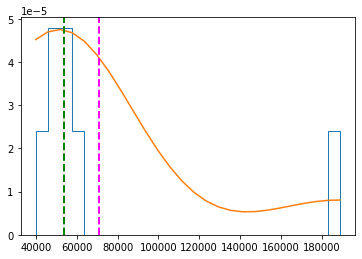

In [23]:
salary = df['Salary']
density = stats.gaussian_kde(salary)
n, x, _ = plt.hist(salary, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Note that the density line takes the form of an asymmetric curve that has a "peak" on the left and a long tail on the right. We describe this sort of data distribution as being *skewed*; that is, the data is not distributed symmetrically but "bunched together" on one side. In this case, the data is bunched together on the left, creating a long tail on the right; and is described as being *right-skewed* because some infrequently occurring high values are pulling the *mean* to the right.

Let's take a look at another set of data. We know how much money our graduates make, but how many hours per week do they need to work to earn their salaries? Here's the data:

| Name     | Hours |
|----------|-------|
| Dan      | 41    |
| Joann    | 40    |
| Pedro    | 36    |
| Rosie    | 30    |
| Ethan    | 35    |
| Vicky    | 39    |
| Frederic | 40    |

Run the following code to show the distribution of the hours worked:

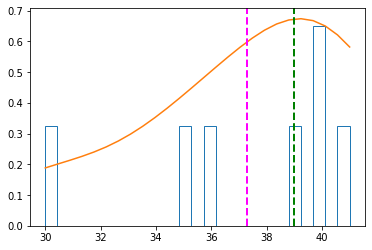

In [24]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Once again, the distribution is skewed, but this time it's **left-skewed**. Note that the curve is asymmetric with the <span style="color:magenta">***mean***</span> to the left of the <span style="color:green">***median***</span> and the *mode*; and the average weekly working hours skewed to the lower end.

Once again, Rosie seems to be getting the better of the deal. She earns more than her former classmates for working fewer hours. Maybe a look at the test scores the students achieved on their final grade at school might help explain her success:

| Name     | Grade |
|----------|-------|
| Dan      | 50    |
| Joann    | 50    |
| Pedro    | 46    |
| Rosie    | 95    |
| Ethan    | 50    |
| Vicky    | 5     |
| Frederic | 57    |

Let's take a look at the distribution of these grades:

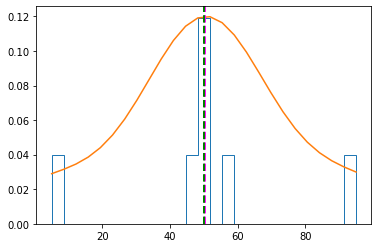

In [25]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Grade':[50,50,46,95,50,5,57]})

grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7.5)
plt.axvline(grade.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(grade.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

This time, the distribution is symmetric, forming a "bell-shaped" curve. The <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, and mode are at the same location, and the data tails off evenly on both sides from a central peak.

Statisticians call this a *normal* distribution (or sometimes a *Gaussian* distribution), and it occurs quite commonly in many scenarios due to something called the *Central Limit Theorem*, which reflects the way continuous probability works - more about that later.

##### 2.1.2.1 Skewness and Kurtosis
You can measure *skewness* (in which direction the data is skewed and to what degree) and kurtosis (how "peaked" the data is) to get an idea of the shape of the data distribution. In Python, you can use the ***skew*** and ***kurt*** functions to find this:

Salary skewness: 2.57316410755049
Salary kurtosis: 6.719828837773431


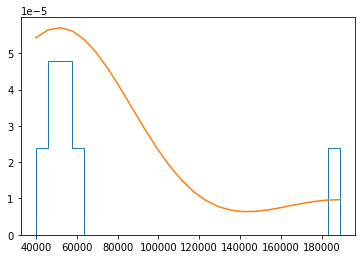



Hours skewness: -1.194570307262883
Hours kurtosis: 0.9412265624999989


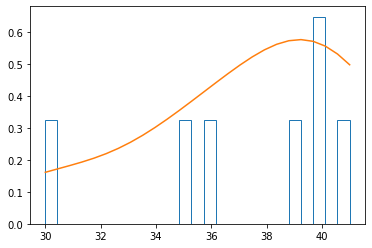



Grade skewness: -0.06512433009682762
Grade kurtosis: 2.7484764913773034


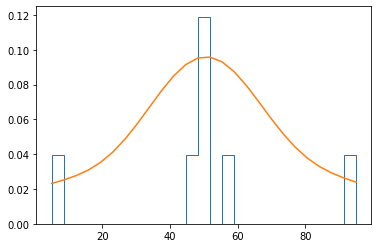

In [26]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

Now let's look at the distribution of a real dataset - let's see how the heights of the father's measured in Galton's study of parent and child heights are distributed:

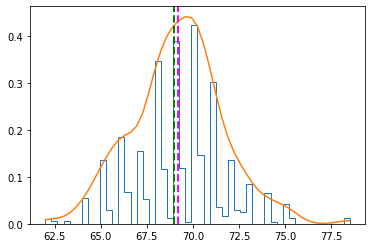

In [28]:
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data


fathers = df['father']
density = stats.gaussian_kde(fathers)
n, x, _ = plt.hist(fathers, histtype='step', density=True, bins=50)  
plt.plot(x, density(x)*2.5)
plt.axvline(fathers.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(fathers.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

As you can see, the father's height measurements are approximately normally distributed - in other words, they form a more or less *normal* distribution that is symmetric around the mean.

#### 2.1.3 Measures of Variance
We can see from the distribution plots of our data that the values in our dataset can vary quite widely. We can use various measures to quantify this variance.

##### 2.1.3.1 Range
A simple way to quantify the variance in a dataset is to identify the difference between the lowest and highest values. This is called the *range*, and is calculated by subtracting the minimim value from the maximum value.

The following Python code creates a single Pandas dataframe for our school graduate data, and calculates the *range* for each of the numeric features:

In [30]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

Salary range: 149000
Hours range: 11
Grade range: 90


##### 2.1.3.2 Percentiles and Quartiles
The range is easy to calculate, but it's not a particularly useful statistic. For example, a range of 149,000 between the lowest and highest salary does not tell us which value within that range a graduate is most likely to earn -  it doesn't tell us nothing about how the salaries are distributed around the mean within that range.  The range tells us very little about the comparative position of an individual value within the distribution - for example, Frederic scored 57 in his final grade at school; which is a pretty good score (it's more than all but one of his classmates); but this isn't immediately apparent from a score of 57 and range of 90.

###### 2.1.3.2.1 Percentiles
A percentile tells us where a given value is ranked in the overall distribution. For example, 25% of the data in a distribution has a value lower than the 25th percentile; 75% of the data has a value lower than the 75th percentile, and so on. Note that half of the data has a value lower than the 50th percentile - so the 50th percentile is also the median!

Let's examine Frederic's grade using this approach. We know he scored 57, but how does he rank compared to his fellow students?

Well, there are seven students in total, and five of them scored less than Frederic; so we can calculate the percentile for Frederic's grade like this:

\begin{equation}\frac{5}{7} \times 100 \approx 71.4\end{equation} 

So Frederic's score puts him at the 71.4th percentile in his class.

In Python, you can use the ***percentileofscore*** function in the *scipy.stats* package to calculate the percentile for a given value in a set of values:

In [31]:
print(stats.percentileofscore(df['Grade'], 57, 'strict'))

71.42857142857143


We've used the strict definition of percentile; but sometimes it's calculated as being the percentage of values that are less than *or equal to* the value you're comparing. In this case, the calculation for Frederic's percentile would include his own score:

\begin{equation}\frac{6}{7} \times 100 \approx 85.7\end{equation} 

You can calculate this way in Python by using the ***weak*** mode of the ***percentileofscore*** function:

In [32]:
print(stats.percentileofscore(df['Grade'], 57, 'weak'))

85.71428571428571


We've considered the percentile of Frederic's grade, and used it to rank him compared to his fellow students. So what about Dan, Joann, and Ethan? How do they compare to the rest of the class? They scored the same grade (50), so in a sense they share a percentile.

To deal with this *grouped* scenario, we can average the percentage rankings for the matching scores. We treat half of the scores matching the one we're ranking as if they are below it, and half as if they are above it. In this case, there were three matching scores of 50, and for each of these we calculate the percentile as if 1 was below and 1 was above. So the calculation for a percentile for Joann based on scores being less than or equal to 50 is:

\begin{equation}(\frac{4}{7}) \times 100 \approx 57.14\end{equation} 

The value of **4** consists of the two scores that are below Joann's score of 50, Joann's own score, and half of the scores that are the same as Joann's (of which there are two, so we count one).

In Python, the ***percentileofscore*** function has a ***rank*** function that calculates grouped percentiles like this:

In [33]:
print(stats.percentileofscore(df['Grade'], 50, 'rank'))

57.142857142857146


###### 2.1.3.2.2 Quartiles
Rather than using individual percentiles to compare data, we can consider the overall spread of the data by dividing those percentiles into four *quartiles*. The first quartile contains the values from the minimum to the 25th percentile, the second from the 25th percentile to the 50th percentile (which is the median), the third from the 50th percentile to the 75th percentile, and the fourth from the 75th percentile to the maximum.

In Python, you can use the ***quantile*** function of the *pandas.dataframe* class to find the threshold values at the 25th, 50th, and 75th percentiles (*quantile* is a generic term for a ranked position, such as a percentile or quartile).

Run the following code to find the quartile thresholds for the weekly hours worked by our former students:

In [34]:
print(df['Hours'].quantile([0.25, 0.5, 0.75]))

0.25    35.5
0.50    39.0
0.75    40.0
Name: Hours, dtype: float64


Its usually easier to understand how data is distributed across the quartiles by visualizing it. You can use a histogram, but many data scientists use a kind of visualization called a *box plot* (or a *box and whiskers* plot).

Let's create a box plot for the weekly hours:

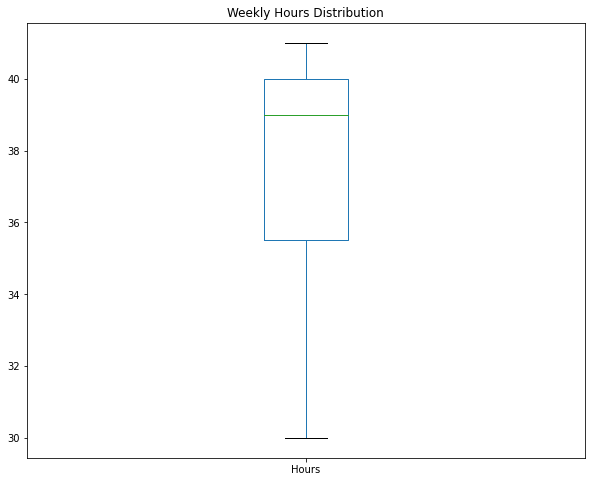

In [35]:
# Plot a box-whisker chart
df['Hours'].plot(kind='box', title='Weekly Hours Distribution', figsize=(10,8))
plt.show()

The box plot consists of:
- A rectangular *box* that shows where the data between the 25th and 75th percentile (the second and third quartile) lie. This part of the distribution is often referred to as the *interquartile range* - it contains the middle 50 data values.
- *Whiskers* that extend from the box to the bottom of the first quartile and the top of the fourth quartile to show the full range of the data.
- A line in the box that shows that location of the median (the 50th percentile, which is also the threshold between the second and third quartile)

In this case, you can see that the interquartile range is between 35 and 40, with the median nearer the top of that range. The range of the first quartile is from around 30 to 35, and the fourth quartile is from 40 to 41.

##### 2.1.3.3 Outliers
Let's take a look at another box plot - this time showing the distribution of the salaries earned by our former classmates:

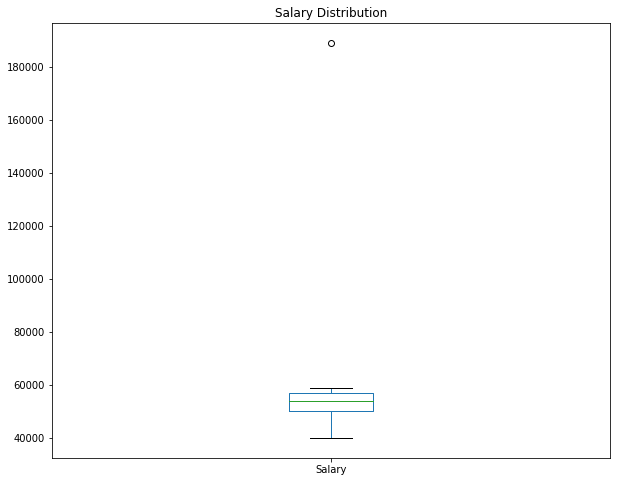

In [36]:
# Plot a box-whisker chart
df['Salary'].plot(kind='box', title='Salary Distribution', figsize=(10,8))
plt.show()

So what's going on here?

Well, as we've already noticed, Rosie earns significantly more than her former classmates. So much more in fact, that her salary has been identifed as an *outlier*. An outlier is a value that is so far from the center of the distribution compared to other values that it skews the distribution by affecting the mean. There are all sorts of reasons that you might have outliers in your data, including data entry errors, failures in sensors or data-generating equipment, or genuinely anomalous values.

So what should we do about it?

This really depends on the data, and what you're trying to use it for. In this case, let's assume we're trying to figure out what's a reasonable expectation of salary for a graduate of our school to earn. Ignoring for the moment that we have an extremly small dataset on which to base our judgement, it looks as if Rosie's salary could be either an error (maybe she mis-typed it in the form used to collect data) or a genuine anomaly (maybe she became a professional athelete or some other extremely highly paid job). Either way, it doesn't seem to represent a salary that a typical graduate might earn.

Let's see what the distribution of the data looks like without the outlier:

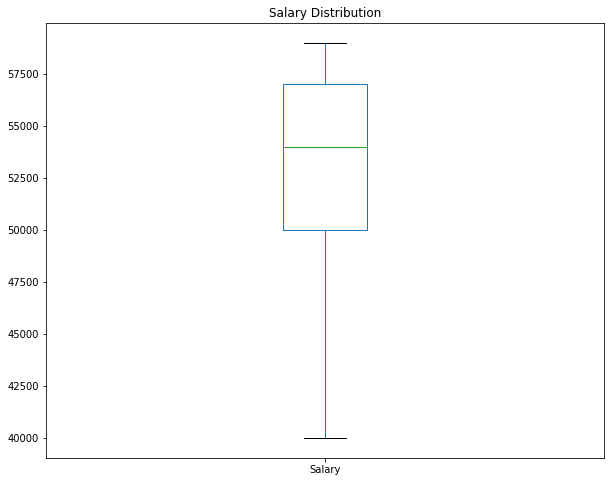

In [37]:
# Plot a box-whisker chart
df['Salary'].plot(kind='box', title='Salary Distribution', figsize=(10,8), showfliers=False)
plt.show()

Now it looks like there's a more even distribution of salaries. It's still not quite symmetrical, but there's much less overall variance. There's potentially some cause here to disregard Rosie's salary data when we compare the salaries, as it is tending to skew the analysis.

So is that OK? Can we really just ignore a data value we don't like?

Again, it depends on what you're analyzing. Let's take a look at the distribution of final grades:

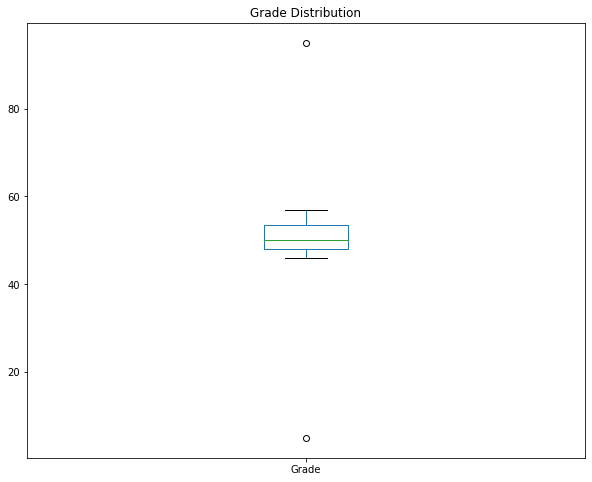

In [38]:
# Plot a box-whisker chart
df['Grade'].plot(kind='box', title='Grade Distribution', figsize=(10,8))
plt.show()

Once again there are outliers, this time at both ends of the distribution. However, think about what this data represents. If we assume that the grade for the final test is based on a score out of 100, it seems reasonable to expect that some students will score very low (maybe even 0) and some will score very well (maybe even 100); but most will get a score somewhere in the middle.  The reason that the low and high scores here look like outliers might just be because we have so few data points. Let's see what happens if we include a few more students in our data:

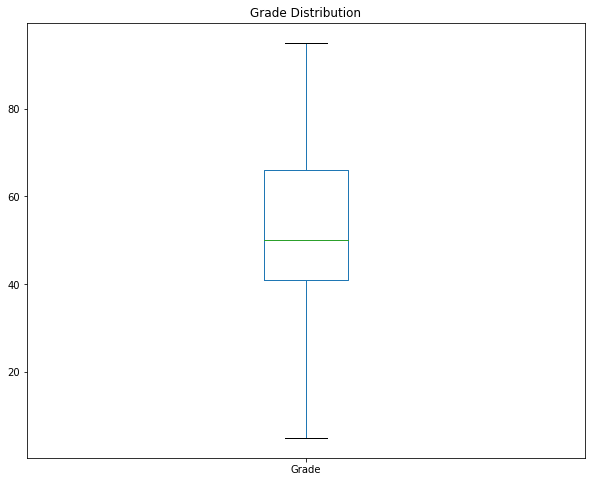

In [39]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Plot a box-whisker chart
df['Grade'].plot(kind='box', title='Grade Distribution', figsize=(10,8))
plt.show()

With more data, there are some more high and low scores; so we no longer consider the isolated cases to be outliers.

The key point to take away here is that you need to really understand the data and what you're trying to do with it, and you need to ensure that you have a reasonable sample size, before determining what to do with outlier values.

##### 2.1.3.4 Variance and Standard Deviation
We've seen how to understand the *spread* of our data distribution using the range, percentiles, and quartiles; and we've seen the effect of outliers on the distribution. Now it's time to look at how to measure the amount of variance in the data.

###### 2.1.3.4.1 Variance
Variance is measured as the average of the squared difference from the mean. For a full population, it's indicated by a squared Greek letter *sigma* (***&sigma;<sup>2</sup>***) and calculated like this:

\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}

For a sample, it's indicated as ***s<sup>2</sup>*** calculated like this:

\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}

In both cases, we sum the difference between the individual data values and the mean and square the result. Then, for a full population we just divide by the number of data items to get the average. When using a sample, we divide by the total number of items **minus 1** to correct for sample bias.

Let's work this out for our student grades (assuming our data is a sample from the larger student population).

First, we need to calculate the mean grade:

\begin{equation}\bar{x} = \frac{50+50+46+95+50+5+57}{7}\approx 50.43\end{equation}

Then we can plug that into our formula for the variance:

\begin{equation}s^{2} = \frac{(50-50.43)^{2}+(50-50.43)^{2}+(46-50.43)^{2}+(95-50.43)^{2}+(50-50.43)^{2}+(5-50.43)^{2}+(57-50.43)^{2}}{7-1}\end{equation}

So:

\begin{equation}s^{2} = \frac{0.185+0.185+19.625+1986.485+0.185+2063.885+43.165}{6}\end{equation}

Which simplifies to:

\begin{equation}s^{2} = \frac{4113.715}{6}\end{equation}

Giving the result:

\begin{equation}s^{2} \approx 685.619\end{equation}

The higher the variance, the more spread your data is around the mean.

In Python, you can use the ***var*** function of the *pandas.dataframe* class to calculate the variance of a column in a dataframe:

In [40]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(df['Grade'].var())

685.6190476190476


###### 2.1.3.4.2 Standard Deviation
To calculate the variance, we squared the difference of each value from the mean. If we hadn't done this, the numerator of our fraction would always end up being zero (because the mean is at the center of our values). However, this means that the variance is not in the same unit of measurement as our data - in our case, since we're calculating the variance for grade points, it's in grade points squared; which is not very helpful.

To get the measure of variance back into the same unit of measurement, we need to find its square root:

\begin{equation}s = \sqrt{685.619} \approx 26.184\end{equation}

So what does this value represent?

It's the *standard deviation* for our grades data. More formally, it's calculated like this for a full population:

\begin{equation}\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}

Or like this for a sample:

\begin{equation}s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}}\end{equation}

Note that in both cases, it's just the square root of the corresponding variance forumla!

In Python, you can calculate it using the ***std*** function:

In [41]:
print(df['Grade'].std())

26.184328282754315


##### 2.1.3.5 Standard Deviation in a Normal Distribution

In statistics and data science, we spend a lot of time considering *normal* distributions; because they occur so frequently. The standard deviation has an important relationship to play in a normal distribution.

Run the following cell to show a histogram of a *standard normal* distribution (which is a distribution with a mean of 0 and a standard deviation of 1):

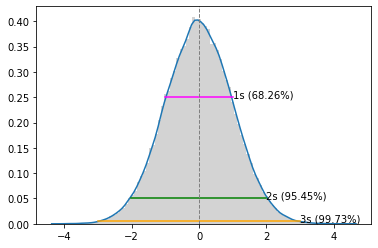

In [43]:
# Create a random standard normal distribution
df = pd.DataFrame(np.random.randn(100000, 1), columns=['Grade'])

# Plot the distribution as a histogram with a density curve
grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df['Grade'].std()
m = df['Grade'].mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(grade.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()

The horizontal colored lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

##### 2.1.3.5 Z Score
So in a normal (or close to normal) distribution, standard deviation provides a way to evaluate how far from a mean a given range of values falls, allowing us to compare where a particular value lies within the distribution. For example, suppose Rosie tells you she was the highest scoring student among her friends - that doesn't really help us assess how well she scored. She may have scored only a fraction of a point above the second-highest scoring student. Even if we know she was in the top quartile; if we don't know how the rest of the grades are distributed it's still not clear how well she performed compared to her friends.

However, if she tells you how many standard deviations higher than the mean her score was, this will help you compare her score to that of her classmates.

So how do we know how many standard deviations above or below the mean a particular value is? We call this a *Z Score*, and it's calculated like this for a full population:

\begin{equation}Z = \frac{x - \mu}{\sigma}\end{equation}

or like this for a sample:

\begin{equation}Z = \frac{x - \bar{x}}{s}\end{equation}

So, let's examine Rosie's grade of 95. Now that we know the *mean* grade is 50.43 and the *standard deviation* is 26.184, we can calculate the Z Score for this grade like this:

\begin{equation}Z = \frac{95 - 50.43}{26.184} = 1.702\end{equation}.

So Rosie's grade is 1.702 standard deviations above the mean.